### Project ppt
https://www.canva.com/design/DAGwlZVI408/OOmnnn-x-2BpLOQkMMokYA/edit?utm_content=DAGwlZVI408&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Data preprocessing

In [ ]:
df=pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
print("Number of duplicate rows: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates: ", df.shape[0])

Number of duplicate rows:  0
Number of rows after removing duplicates:  768


In [ ]:
display(df['Pregnancies'].unique())

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
display(df['BloodPressure'].unique())

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
display(df['SkinThickness'].unique())

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
display(df['Insulin'].unique())

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
display(df['BMI'].unique())

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
display(df['DiabetesPedigreeFunction'].unique())

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [ ]:
display(df['Age'].unique())

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
display(df['Outcome'].unique())

array([1, 0])

In [ ]:
display(df['Glucose'].unique())

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

# EDA

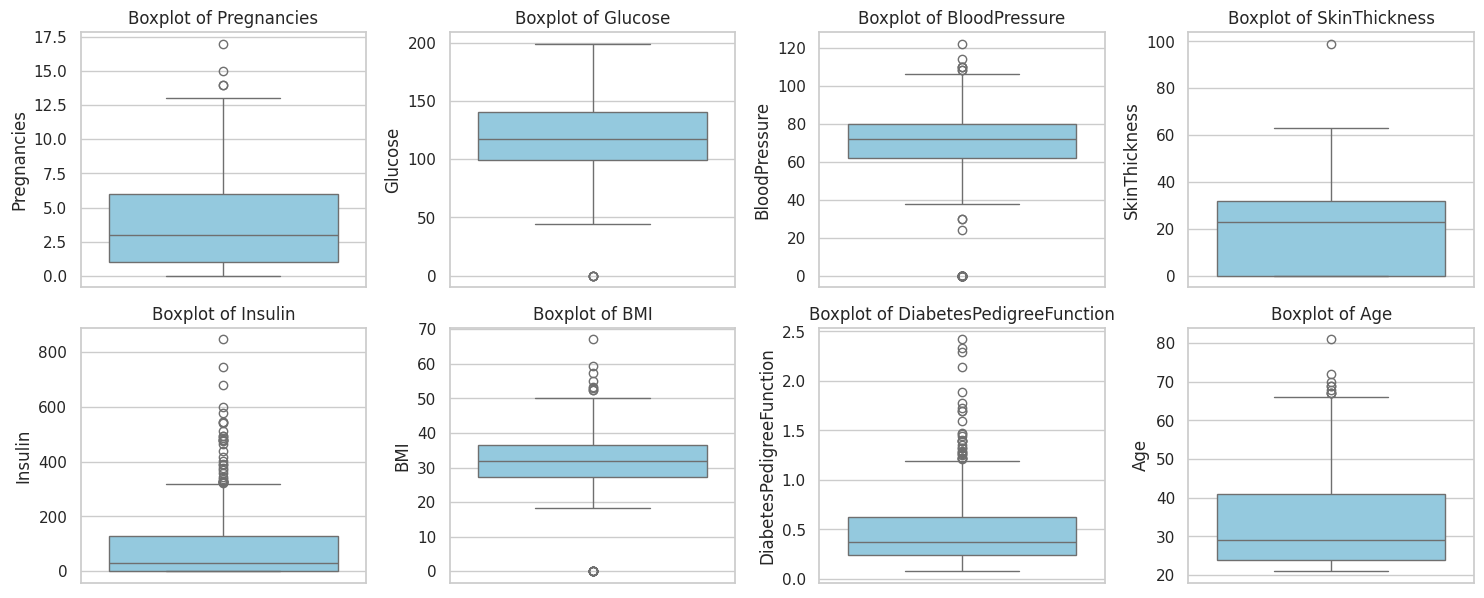

In [ ]:
sns.set(style="whitegrid")
features = df.columns[:-1]
# Create boxplots for each feature to spot outliers
plt.figure(figsize=(15, 12))

for i, column in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()

In [ ]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
iqr
df_clean = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape[0]-df_clean.shape[0]

129

In [ ]:
df=df_clean
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


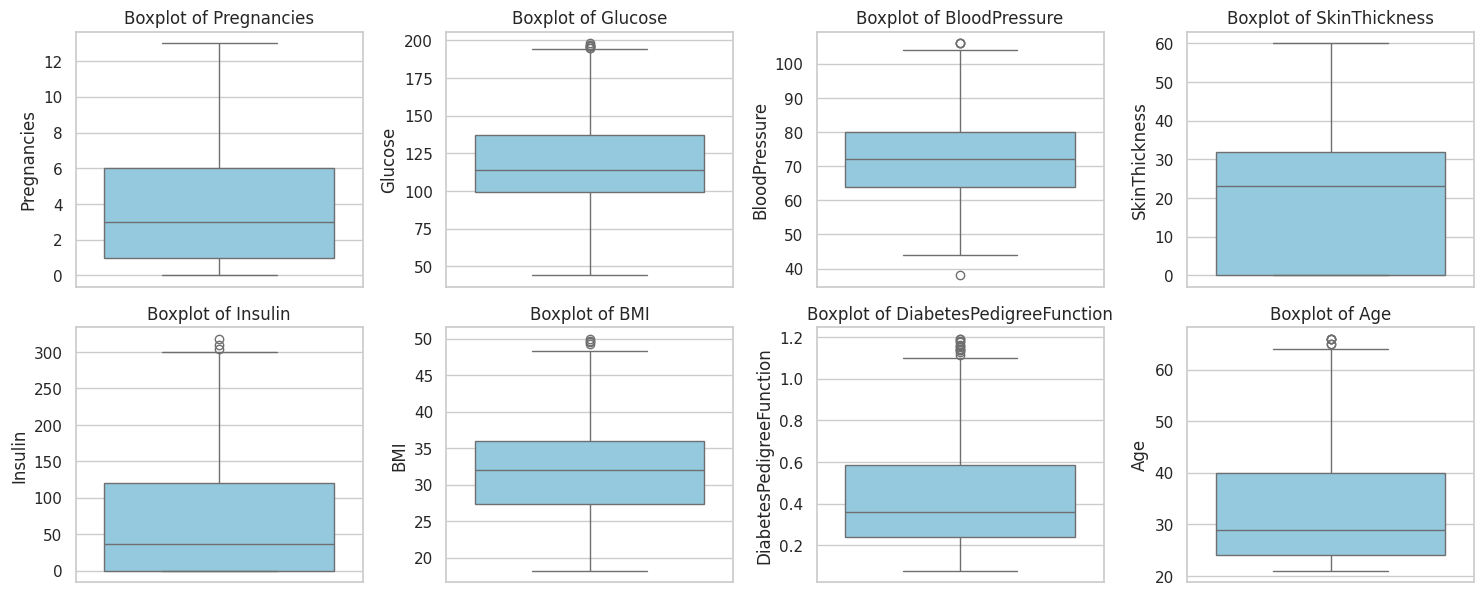

In [ ]:
sns.set(style="whitegrid")
features = df.columns[:-1]
# Create boxplots for each feature to spot outliers
plt.figure(figsize=(15, 12))
for i, column in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()

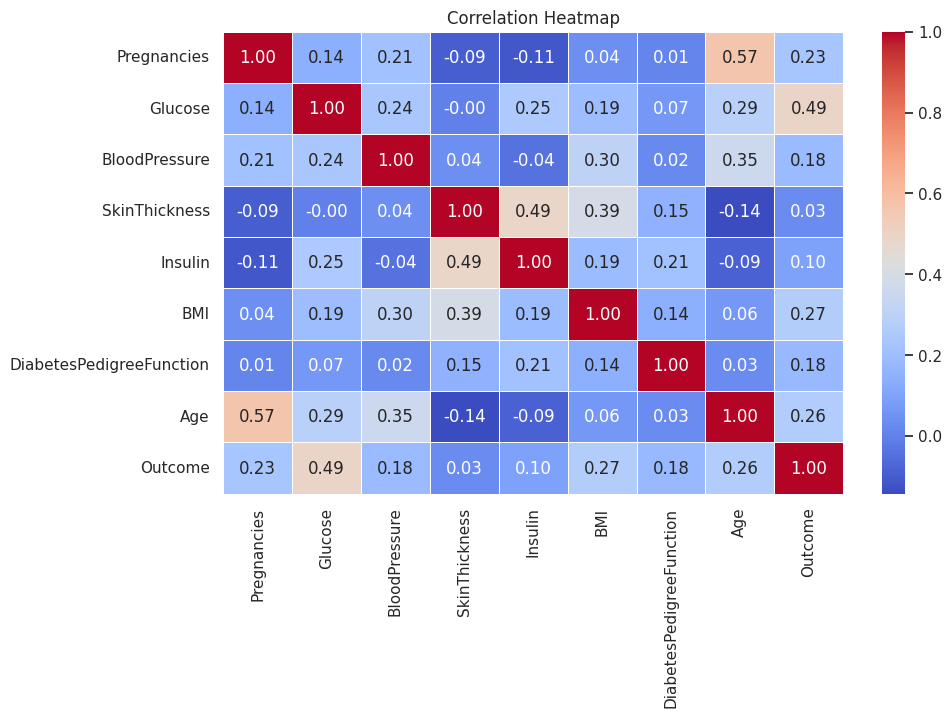

In [ ]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

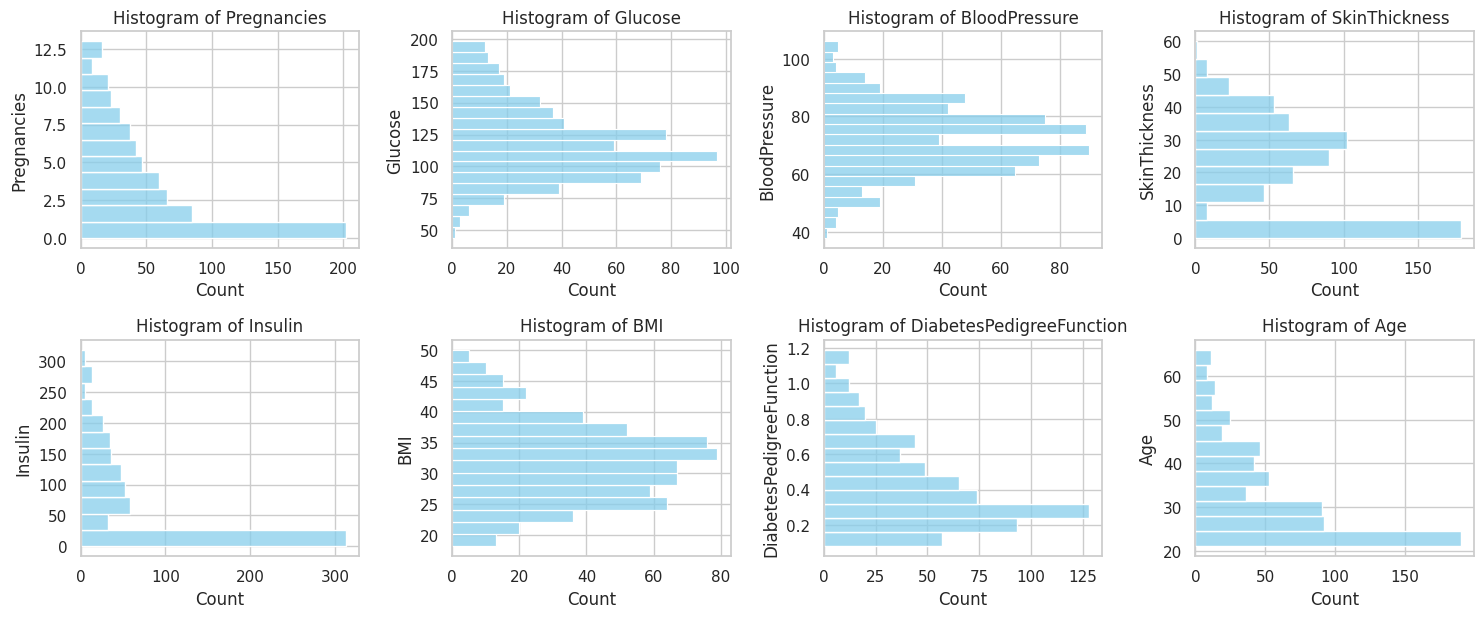

In [ ]:
sns.set(style="whitegrid")
features = df.columns[:-1]
plt.figure(figsize=(15, 12))
for i, column in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(y=df[column], color="skyblue")
    plt.title(f"Histogram of {column}")
    plt.tight_layout()

plt.show()

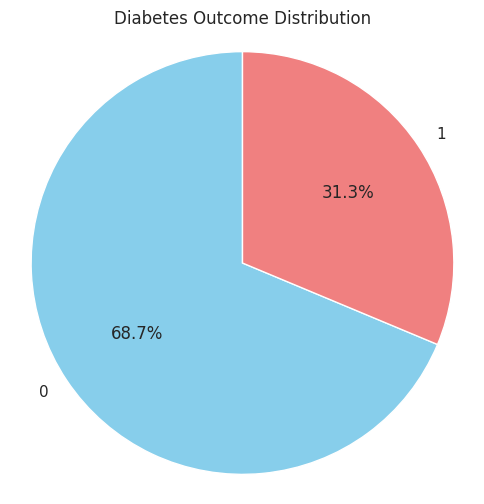

In [ ]:
#Pie Chart
labels = df['Outcome'].value_counts().index
sizes = df['Outcome'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Diabetes Outcome Distribution")
plt.axis('equal')
plt.show()

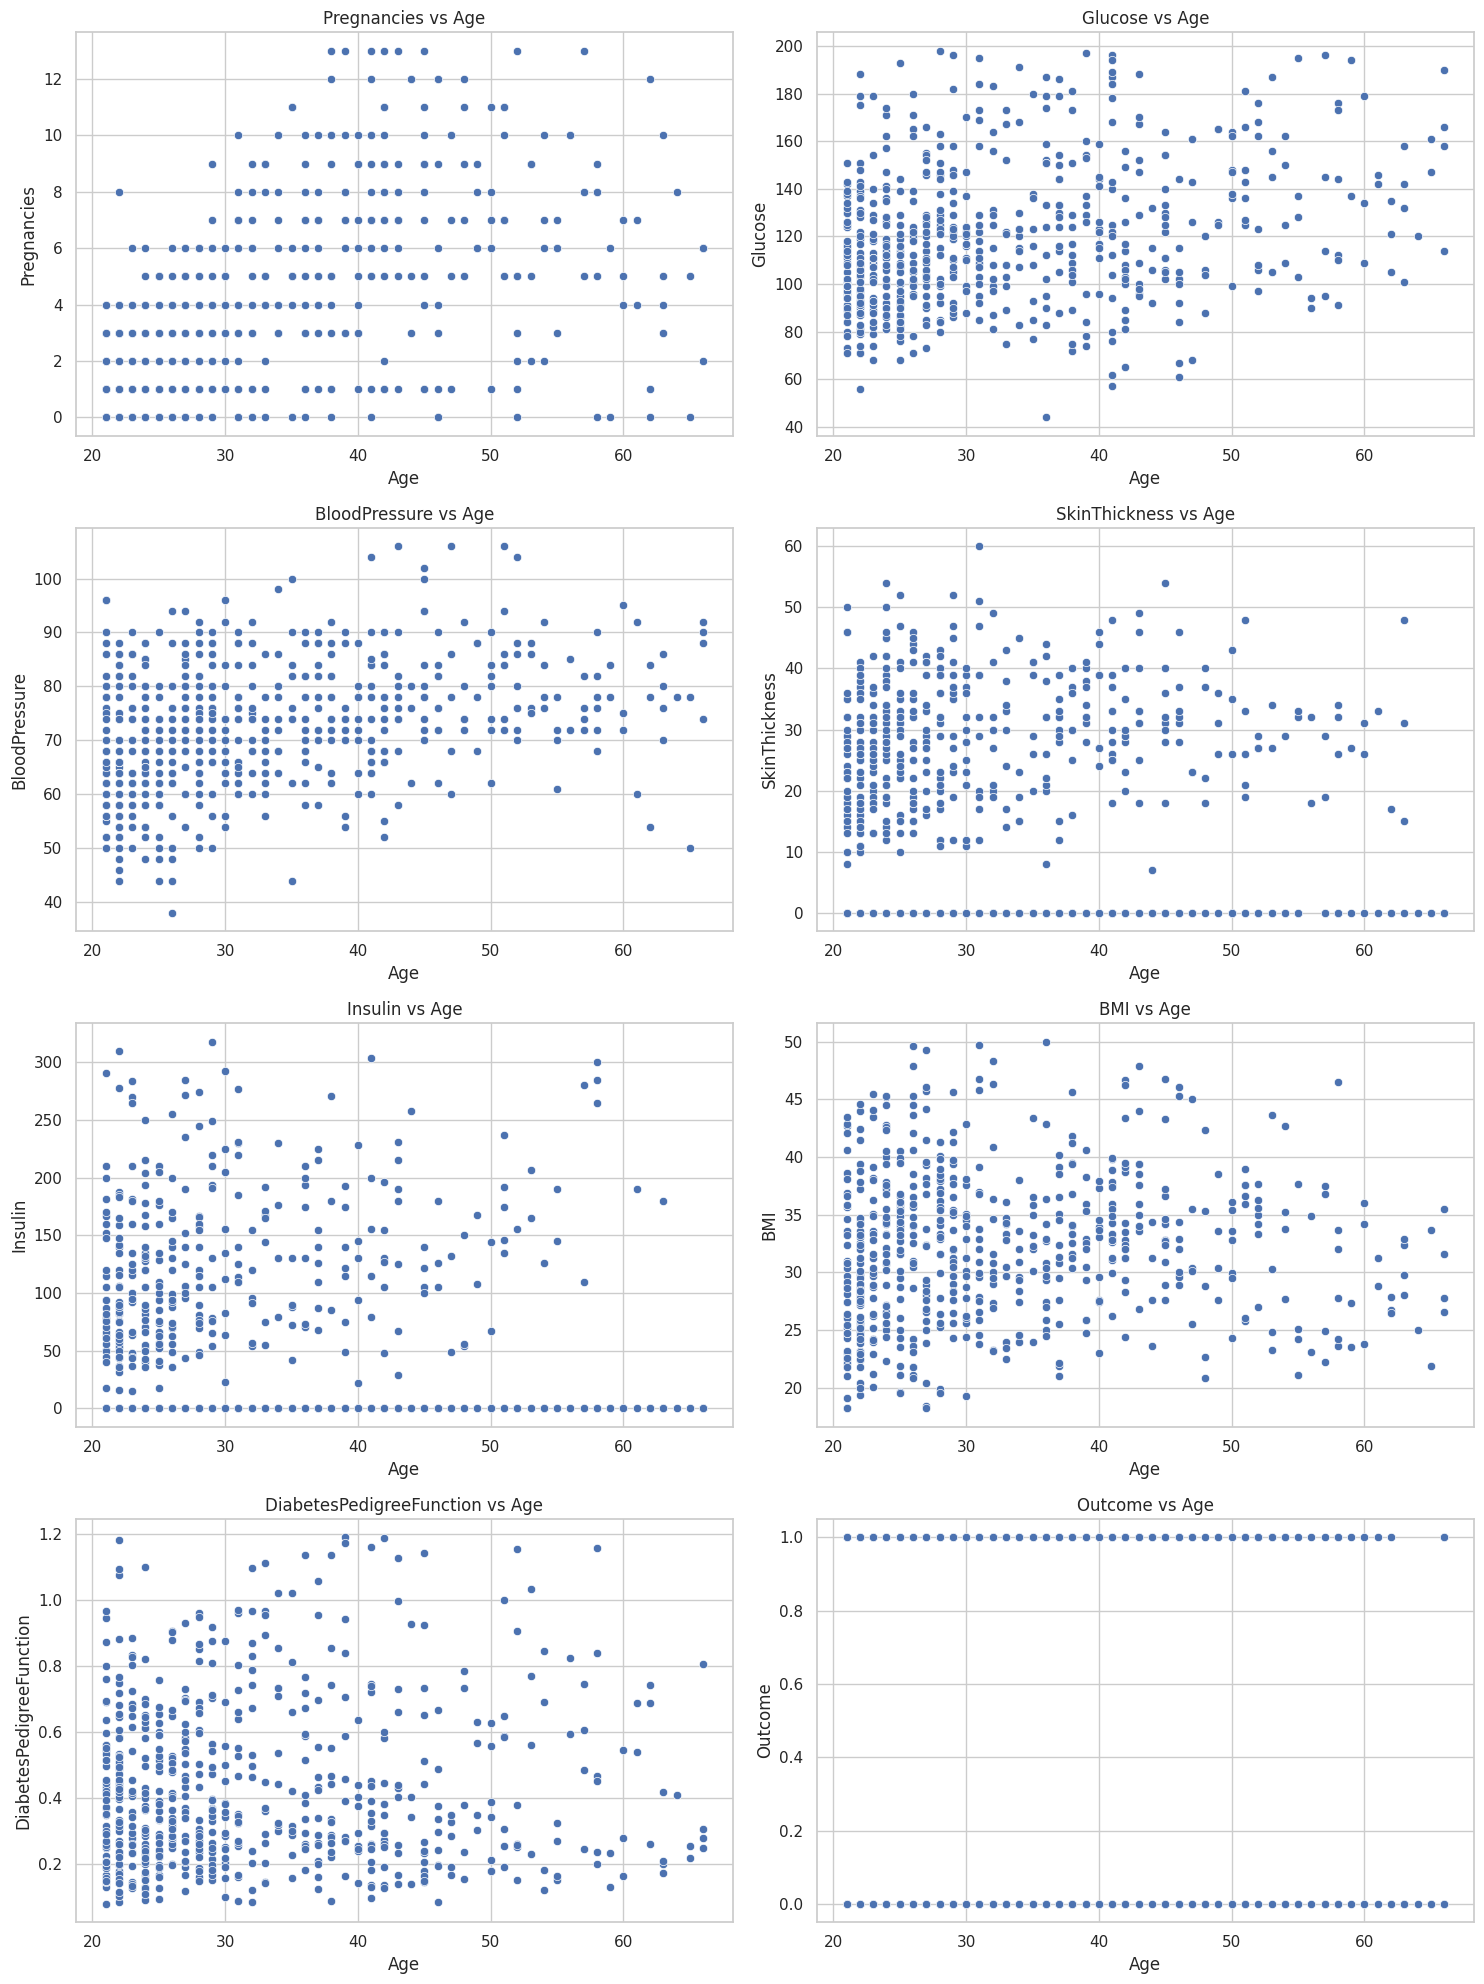

In [ ]:
# Set figure size and layout
plt.figure(figsize=(15, 20))
features = df.columns.drop('Age')
# Loop and plot each column vs Age
for i, col in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x='Age', y=col, data=df)
    plt.title(f'{col} vs Age')
    plt.xlabel('Age')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

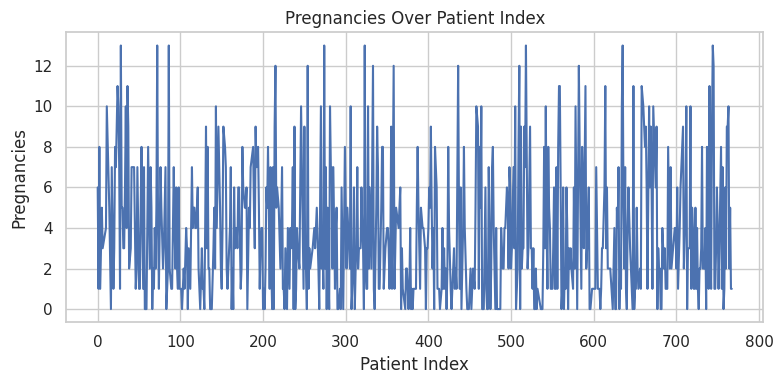

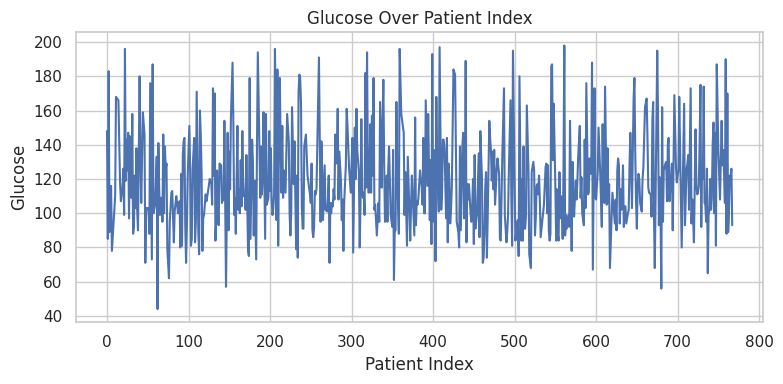

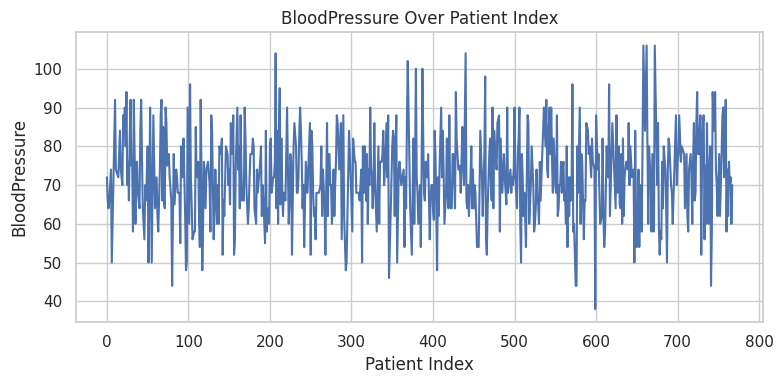

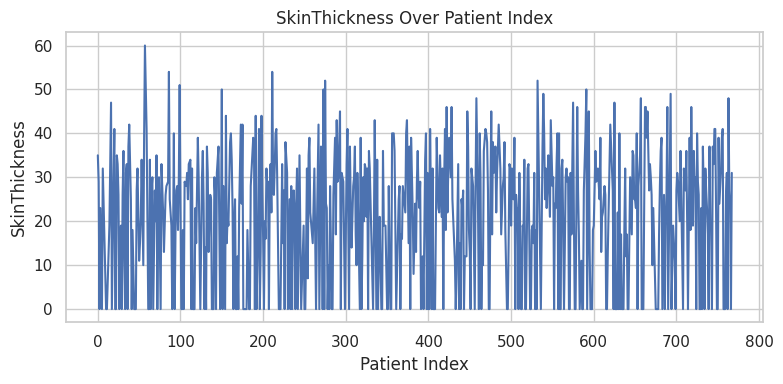

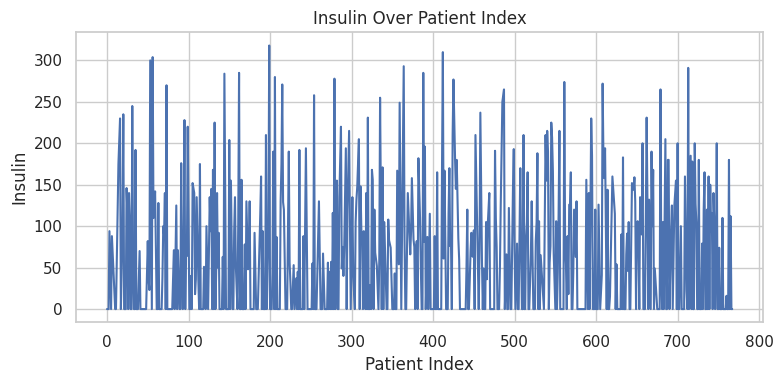

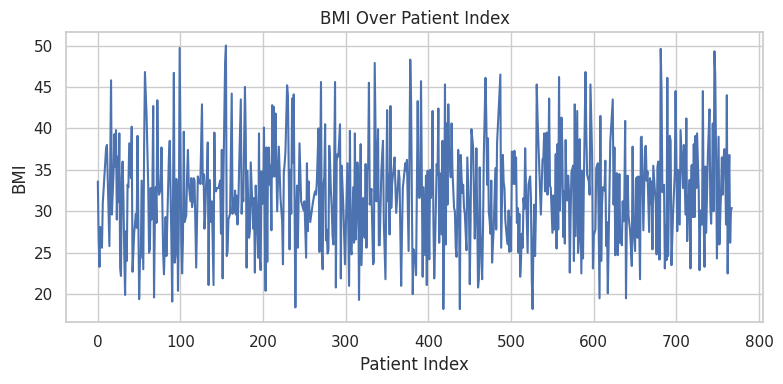

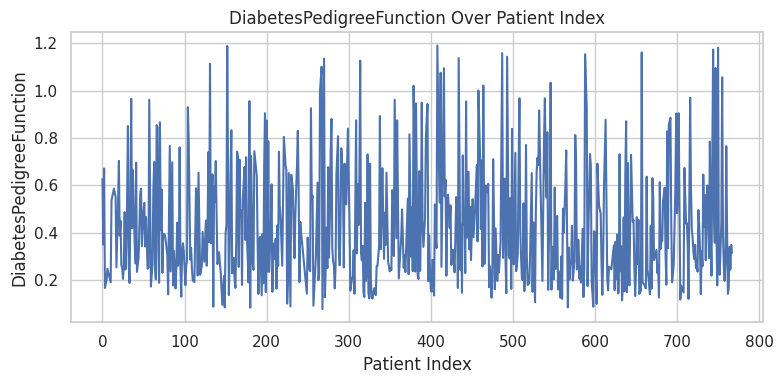

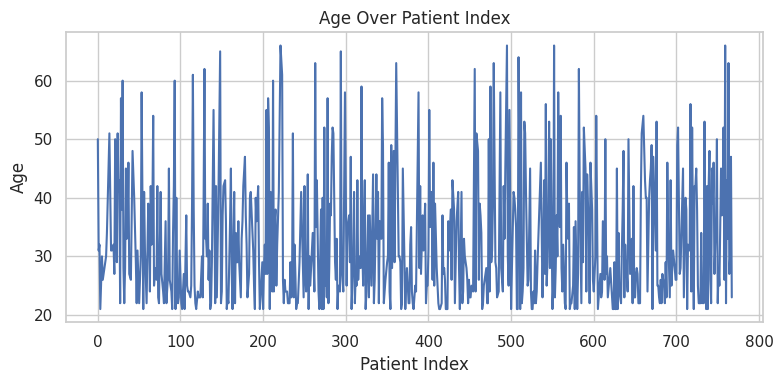

In [ ]:
#Lineplot

features = df.columns.drop('Outcome')

for col in features:
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=df.index, y=df[col])
    plt.title(f'{col} Over Patient Index')
    plt.xlabel("Patient Index")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Model application


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (511, 8)
Shape of X_test: (128, 8)
Shape of y_train: (511,)
Shape of y_test: (128,)


In [ ]:

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:\n", report_dt)
print("Confusion Matrix:\n", confusion_dt)

Decision Tree Classifier Performance:
Accuracy: 0.7265625
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        92
           1       0.51      0.50      0.51        36

    accuracy                           0.73       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.72      0.73      0.73       128

Confusion Matrix:
 [[75 17]
 [18 18]]


In [ ]:

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", confusion_rf)

Random Forest Classifier Performance:
Accuracy: 0.8046875
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        92
           1       0.69      0.56      0.62        36

    accuracy                           0.80       128
   macro avg       0.76      0.73      0.74       128
weighted avg       0.80      0.80      0.80       128

Confusion Matrix:
 [[83  9]
 [16 20]]


In [ ]:
# Initialize and train the Bagging
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
report_bagging = classification_report(y_test, y_pred_bagging)
confusion_bagging = confusion_matrix(y_test, y_pred_bagging)

print("Bagging Classifier Performance:")
print(f"Accuracy: {accuracy_bagging}")
print("Classification Report:\n", report_bagging)
print("Confusion Matrix:\n", confusion_bagging)


Bagging Classifier Performance:
Accuracy: 0.796875
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        92
           1       0.66      0.58      0.62        36

    accuracy                           0.80       128
   macro avg       0.75      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128

Confusion Matrix:
 [[81 11]
 [15 21]]


In [ ]:

# Initialize and train the Boosting Classifier
boosting_model = GradientBoostingClassifier(random_state=42)

boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_boosting = boosting_model.predict(X_test)

# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
report_boosting = classification_report(y_test, y_pred_boosting)
confusion_boosting = confusion_matrix(y_test, y_pred_boosting)

print("Boosting Classifier Performance:")
print(f"Accuracy: {accuracy_boosting}")
print("Classification Report:\n", report_boosting)
print("Confusion Matrix:\n", confusion_boosting)

Boosting Classifier Performance:
Accuracy: 0.8515625
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        92
           1       0.77      0.67      0.72        36

    accuracy                           0.85       128
   macro avg       0.83      0.80      0.81       128
weighted avg       0.85      0.85      0.85       128

Confusion Matrix:
 [[85  7]
 [12 24]]


In [ ]:
# Initialize and train the SVC model
svc_model = SVC(random_state=42)

svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)
confusion_svc = confusion_matrix(y_test, y_pred_svc)

print("Support Vector Classifier Performance:")
print(f"Accuracy: {accuracy_svc}")
print("Classification Report:\n", report_svc)
print("Confusion Matrix:\n", confusion_svc)

Support Vector Classifier Performance:
Accuracy: 0.8046875
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        92
           1       0.82      0.39      0.53        36

    accuracy                           0.80       128
   macro avg       0.81      0.68      0.70       128
weighted avg       0.81      0.80      0.78       128

Confusion Matrix:
 [[89  3]
 [22 14]]


In [ ]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors Classifier Performance:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:\n", report_knn)
print("Confusion Matrix:\n", confusion_knn)

K-Nearest Neighbors Classifier Performance:
Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        92
           1       0.64      0.50      0.56        36

    accuracy                           0.78       128
   macro avg       0.73      0.70      0.71       128
weighted avg       0.77      0.78      0.77       128

Confusion Matrix:
 [[82 10]
 [18 18]]


In [ ]:

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42,C= 0.01, max_iter= 100, solver='lbfgs')

lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr}")
print("Classification Report:\n", report_lr)
print("Confusion Matrix:\n", confusion_lr)

Logistic Regression Performance:
Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        92
           1       0.68      0.42      0.52        36

    accuracy                           0.78       128
   macro avg       0.74      0.67      0.69       128
weighted avg       0.77      0.78      0.76       128

Confusion Matrix:
 [[85  7]
 [21 15]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# model results

In [ ]:

model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Bagging', 'Boosting', 'SVC', 'KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_bagging, accuracy_boosting, accuracy_svc, accuracy_knn, accuracy_lr]
})

model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

print("Model Comparison:")
display(model_comparison)

Model Comparison:


,Model,Accuracy
3,Boosting,0.851562
4,SVC,0.804688
1,Random Forest,0.804688
2,Bagging,0.796875
5,KNN,0.781250
6,Logistic Regression,0.781250
0,Decision Tree,0.726562


/tmp/ipython-input-1130423468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')


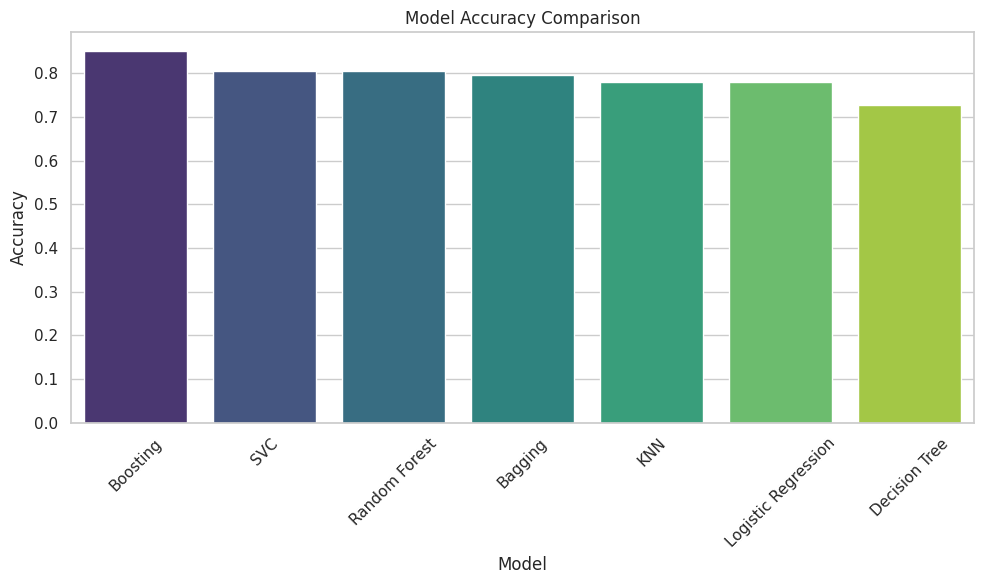

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANN

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model2.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history2= model2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6776 - loss: 10.4378 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6657 - loss: 4.3106 - precision: 0.0777 - recall: 0.0193
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3979 - loss: 1.3809 - precision: 0.3150 - recall: 0.7444 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.9426 - precision: 0.1386 - recall: 0.0451         
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5353 - loss: 0.7197 - precision: 0.2011 - recall: 0.1648
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6482 - loss: 0.6701 - precision: 0.2793 - recall: 0.0653
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6614 - loss: 0.6503 - precision: 0.3375 - recall: 0.0610         
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6706 - loss: 0.6308 - precision: 0.4366 - recall: 0.0

In [ ]:
model2.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,885 (11.27 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,924 (7.52 KB)

<Axes: >

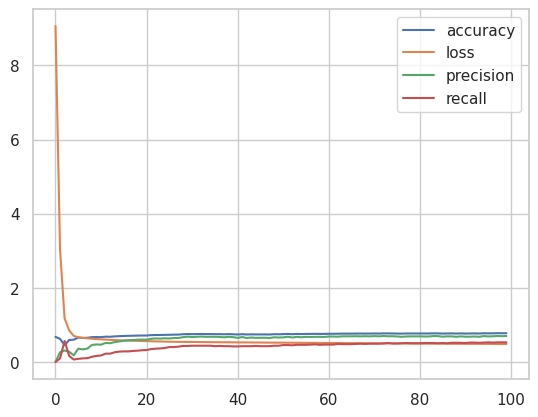

In [ ]:
pd.DataFrame(history2.history).plot()

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model

model3= tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history3= model3.fit(X_train, y_train, epochs= 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4574 - loss: 7.9681 - precision: 0.3278 - recall: 0.6414
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5074 - loss: 1.7583 - precision: 0.3286 - recall: 0.5263
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6386 - loss: 1.0756 - precision: 0.4300 - recall: 0.4273
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6911 - loss: 0.8186 - precision: 0.5092 - recall: 0.4757
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 0.7099 - precision: 0.5509 - recall: 0.4561
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7141 - loss: 0.6358 - precision: 0.5679 - recall: 0.4837 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7234 - loss: 0.5849 - precision: 0.5893 - recall: 0.4780 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7238 - loss: 0.5600 - precision: 0.5893 - recall: 0.4738 
Epoch 9/100
16/16 ━

<Axes: >

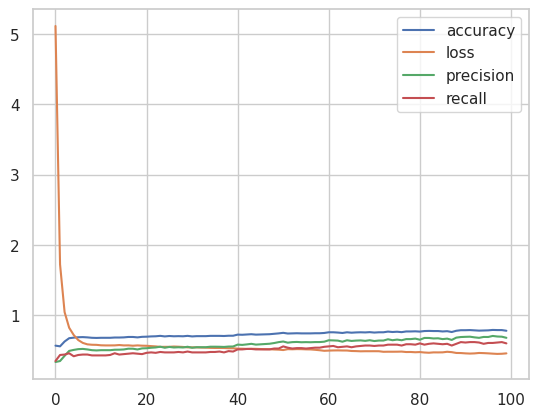

In [ ]:
pd.DataFrame(history3.history).plot()

In [ ]:
model3.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [ ]:
model3.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6396 - loss: 0.6952 - precision: 0.3803 - recall: 0.4034 


[0.631498396396637, 0.6953125, 0.4615384638309479, 0.5]

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score
import numpy as np

tf.random.set_seed(42)

# Function to build ANN with advanced features
def build_ann(learning_rate=0.001, activation='relu', neurons=[32,16,8], dropout=0.2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Hidden layers with BatchNorm + Dropout
    for n in neurons:
        model.add(tf.keras.layers.Dense(n, activation=activation))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(dropout))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    return model


# Hyperparameter search space
param_grid = {
    "learning_rates": [0.01, 0.001, 0.0005],
    "activations": ['relu', 'tanh'],
    "neurons": [[64,32,16], [32,16,8], [16,8]],
    "batch_sizes": [16, 32],
    "epochs": [50, 100],
    "dropouts": [0.2, 0.3]
}

# EarlyStopping + ReduceLROnPlateau
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

results = []
best_acc = 0
best_model = None
best_params = None

for lr in param_grid["learning_rates"]:
    for act in param_grid["activations"]:
        for neuron_config in param_grid["neurons"]:
            for bs in param_grid["batch_sizes"]:
                for ep in param_grid["epochs"]:
                    for dr in param_grid["dropouts"]:
                        print(f"Testing: LR={lr}, Act={act}, Neurons={neuron_config}, Dropout={dr}, Batch={bs}, Epochs={ep}")
                        model = build_ann(learning_rate=lr, activation=act, neurons=neuron_config, dropout=dr)

                        history = model.fit(
                            X_train, y_train,
                            epochs=ep,
                            batch_size=bs,
                            validation_split=0.2,
                            callbacks=[early_stop, reduce_lr],
                            verbose=0
                        )

                        # Evaluate
                        y_pred = (model.predict(X_test) > 0.5).astype("int32")
                        loss, acc, prec, rec = model.evaluate(X_test, y_test, verbose=0)
                        f1 = f1_score(y_test, y_pred)

                        results.append((lr, act, neuron_config, dr, bs, ep, acc, prec, rec, f1))

                        if acc > best_acc:
                            best_acc = acc
                            best_params = (lr, act, neuron_config, dr, bs, ep)
                            best_model = model

print("✅ Best Accuracy:", best_acc)
print("✅ Best Params:", best_params)


Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.2, Batch=16, Epochs=50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.3, Batch=16, Epochs=50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.2, Batch=16, Epochs=100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.3, Batch=16, Epochs=100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.2, Batch=32, Epochs=50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.3, Batch=32, Epochs=50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.2, Batch=32, Epochs=100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Testing: LR=0.01, Act=relu, Neurons=[64, 32, 16], Dropout=0.3, Batch=32, Epochs=100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Testing: LR=0.01, Ac

In [ ]:
import tensorflow as tf

tf.random.set_seed(16)

# STEP1: Creating the model

model4= tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model4.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history4= model4.fit(X_train, y_train, epochs= 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5361 - loss: 3.3638 - precision: 0.3719 - recall: 0.4930
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5164 - loss: 1.8798 - precision: 0.3732 - recall: 0.4817 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6189 - loss: 1.0240 - precision: 0.3513 - recall: 0.2333
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6650 - loss: 0.6432 - precision: 0.5268 - recall: 0.4166
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6469 - loss: 0.6189 - precision: 0.5026 - recall: 0.4223
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6709 - loss: 0.6557 - precision: 0.5633 - recall: 0.4221
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 0.6389 - precision: 0.5570 - recall: 0.4403  
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6651 - loss: 0.6350 - precision: 0.5671 - recall: 0.4102 
Epoch 9/100
16/16 ━━

In [ ]:
model4.summary();

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_568 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_569 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_570 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_571 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,789 (34.34 KB)

 Trainable params: 2,929 (11.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,860 (22.89 KB)

<Axes: >

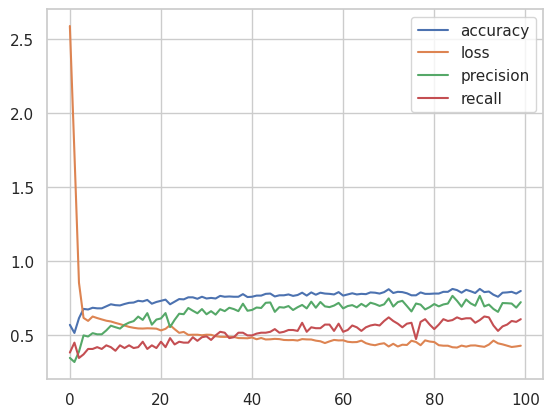

In [ ]:
pd.DataFrame(history4.history).plot()

In [ ]:
model4.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7406 - loss: 0.5631 - precision: 0.5888 - recall: 0.4343 


[0.4874541163444519, 0.765625, 0.6153846383094788, 0.4444444477558136]

# VIF


In [ ]:
# VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Separate features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Add constant for statsmodels
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
                    Feature        VIF
0                     const  58.394963
1               Pregnancies   1.484983
2                   Glucose   1.272454
3             BloodPressure   1.286799
4             SkinThickness   1.582690
5                   Insulin   1.516406
6                       BMI   1.350522
7  DiabetesPedigreeFunction   1.063017
8                       Age   1.716285


# VIF MODELS


In [ ]:
models = {

    "SVC": SVC(probability=True, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

In [ ]:
for ratio in [0.2, 0.25, 0.3]:   # 80-20, 75-25, 70-30
    print(f"\n============================")
    print(f"Train-Test Split: {int((1-ratio)*100)}-{int(ratio*100)}")
    print("============================")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ratio, random_state=42, stratify=y
    )

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")


Train-Test Split: 80-20
SVC Accuracy: 0.7500
RandomForest Accuracy: 0.7812
Bagging Accuracy: 0.7344
KNN Accuracy: 0.7109
LogisticRegression Accuracy: 0.7656
DecisionTree Accuracy: 0.6719

Train-Test Split: 75-25
SVC Accuracy: 0.7750
RandomForest Accuracy: 0.7688
Bagging Accuracy: 0.7500
KNN Accuracy: 0.7188
LogisticRegression Accuracy: 0.7438
DecisionTree Accuracy: 0.7188

Train-Test Split: 70-30
SVC Accuracy: 0.7760
RandomForest Accuracy: 0.7656
Bagging Accuracy: 0.7708
KNN Accuracy: 0.7135
LogisticRegression Accuracy: 0.7448
DecisionTree Accuracy: 0.7188
